# Pré processamento dos dados
## Conhecendo os dados 

## Objetivos: 
    -> Criar uma cópia DataFrame, utilizando a formatação Datetime (1) ok!
    -> Armazenar a potência máxima dos dias (2) ok!
    -> Armazenar a potência máxima das semanas (3) ok!
    -> Plotar os dados dos dias (4) ok!
    -> Plotar os dados das semenais (5) ok!

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
path = '/home/kr0pt/Documents/Pesquisa/Codes_notgit/Dados/Dados_JPS_12B1(01_01_2008-0h0m--31_12_2013-23h45m).csv'
df_bruto = pd.read_csv(path, sep=';')

In [3]:
#conhecendo o Dataframe

df_bruto.head(n=6)

,DIA,MES,ANO,HORA,MINUTO,JPS_12B1,Unnamed: 6
0,1,1,2008,0,0,"7,90000009536743",NaN
1,1,1,2008,0,15,"7,69999980926514",NaN
2,1,1,2008,0,30,"7,69999980926514",NaN
3,1,1,2008,0,45,"7,40000009536743",NaN
4,1,1,2008,1,0,"7,40000009536743",NaN
5,1,1,2008,1,15,"7,40000009536743",NaN


##### Após JPS_12B1 existe um ponto e vírgula ";", por esse motivo o Pandas identificou a existência de uma coluna a mais que chamou de 'Unnamed: 6', o próximo passo é remove-la. 

In [4]:
#informamos em ordem, a coluna que desejamos excluir, afirmamos que a auteração deve ser feita no DF original e por fim,
#dizemos que a exclusão é aplicada na coluna. 

df_bruto.drop('Unnamed: 6', inplace=True, axis=1)
df_bruto.head()

,DIA,MES,ANO,HORA,MINUTO,JPS_12B1
0,1,1,2008,0,0,"7,90000009536743"
1,1,1,2008,0,15,"7,69999980926514"
2,1,1,2008,0,30,"7,69999980926514"
3,1,1,2008,0,45,"7,40000009536743"
4,1,1,2008,1,0,"7,40000009536743"


#### 1 - Criando uma cópia do dataframe bruto para realizar as modificações desejadas (formatação Datetime)

In [5]:
#Criando um novo dataframe para que as modificações desejadas sejam feitas

df = pd.DataFrame(columns=['Tempo','Potencia']) 

#### Criando as colunas do novo dataframe formado

In [6]:
#a coluna Tempo é formada pela lista tempo

df['Tempo'] = df_bruto['ANO'].astype(str) + '-' + df_bruto['MES'].astype(str) + '-' + df_bruto['DIA'].astype(str) + ' ' + df_bruto['HORA'].astype(str) + ':' + df_bruto['MINUTO'].astype(str)

df['Tempo'] = pd.to_datetime(df.Tempo)
df.head()

,Tempo,Potencia
0,2008-01-01 00:00:00,NaN
1,2008-01-01 00:15:00,NaN
2,2008-01-01 00:30:00,NaN
3,2008-01-01 00:45:00,NaN
4,2008-01-01 01:00:00,NaN


In [7]:
#No dataframe bruto temos a potência na coluna coluna JPS_12B1 
#dada por uma string que representa um número e utiliza ',' como notação. 
#Foi alterado a ',' -> '.' e a string em um float

df['Potencia'] = df_bruto['JPS_12B1'].str.replace(',','.').astype(float) * 10**14

In [8]:
df.head()

,Tempo,Potencia
0,2008-01-01 00:00:00,7.900000e+14
1,2008-01-01 00:15:00,7.700000e+14
2,2008-01-01 00:30:00,7.700000e+14
3,2008-01-01 00:45:00,7.400000e+14
4,2008-01-01 01:00:00,7.400000e+14


#### 2 - Criando um novo dataframe com as potências máximas de cada dia

In [9]:
df_maxpot_dia = pd.DataFrame(columns=['Dia','Potencia Maxima']) 

In [10]:
#O método .dt.date retorna um datetime ano-mês-dia, ou seja retira as horas e minutos dos nossos dados
#A função set() retorna essa lista de datetimes sem repetições, visto que cada dia só terá uma potência máxima
#A função sorted() organiza a lista sem repetições de forma crescente

df_maxpot_dia['Dia'] = sorted(set(df['Tempo'].dt.date))    
df_maxpot_dia.head()

,Dia,Potencia Maxima
0,2008-01-01,NaN
1,2008-01-02,NaN
2,2008-01-03,NaN
3,2008-01-04,NaN
4,2008-01-05,NaN


#### Desejamos nesse próximo bloco realizar a escolha da potência máxima diária. Para isso foi criado um laço de repetição "for" que a cada interação estará salvando na coluna 'Potencia Maxima' o valor máximo da potência no dia representado pela linha do dataframe.

##### Explicando:

##### -> df_maxpot_dia.index retorna o número de linhas do dataframe, ou seja a quantidade de dias;

##### -> A funça range(quantidade_de_dias) retorna uma lista de 0 até a quantidade_de_dias; 
    
##### -> df.loc[df['Tempo'].dt.date == df_maxpot_dia['Dia'][dia]] retorna um Dataframe de todas as potências aferidas de um dia especificado pela coluna 'Dia' e linha 'dia' do dataframe df_max_pot_dia; 

##### -> Ao adicionarmos ["Potência"].max(), ao dataframe de todas as potências aferidas no dia, estaremos retornando o valor máximo de potência aferido no dia;

##### -> Esse valor, é salvo no dataframe df_maxpot_dia na coluna 'Potencia Maxima' e na linha referente ao dia em questão.

In [11]:
quantidade_de_dias = len(df_maxpot_dia.index)

for dia in range(quantidade_de_dias):
    df_maxpot_dia.loc[dia, 'Potencia Maxima'] =  df.loc[df['Tempo'].dt.date == df_maxpot_dia['Dia'][dia]]['Potencia'].max()

In [12]:
df_maxpot_dia.head()

,Dia,Potencia Maxima
0,2008-01-01,9e+14
1,2008-01-02,1.32e+15
2,2008-01-03,1.39e+15
3,2008-01-04,1.3e+15
4,2008-01-05,9.8e+14


#### 3 - Criando um novo dataframe com as potências máximas de cada semana

In [13]:
df_maxpot_semana = pd.DataFrame(columns=['Semana','Potencia Maxima']) 

#### No dataframe os dados começam a contar do dia 1 de janeiro de 2008, terça-feira, porém a primeira semana só deve ser contabilizada a partir do primeiro domingo do mês (6 de janeiro)

In [14]:
#tanto os primeros 5 dias quanto os últimos 3 dias devem ser ignorados?
semanas = (df_maxpot_dia['Dia'].count()-5)//7   

#criando a coluna com referente a semana 
df_maxpot_semana['Semana'] = [s for s in range(semanas)]
df_maxpot_semana.head()

,Semana,Potencia Maxima
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN


In [15]:
#Essa estrutura irá pegar a partir do primeiro dia da primeira semana de janeiro de 2008 (dia 5), as potências máximas diárias da semana. 

for linha in range(semanas):
    df_maxpot_semana.loc[linha,'Potencia Maxima'] = df_maxpot_dia.iloc[5+7*linha:12+7*linha]['Potencia Maxima'].max()

In [16]:
df_maxpot_semana.head(n=15)

,Semana,Potencia Maxima
0,0,1.59e+15
1,1,1.46e+15
2,2,1.58e+15
3,3,1.6e+15
4,4,1.63e+15
5,5,1.67e+15
6,6,1.7e+15
7,7,1.71e+15
8,8,1.73e+15
9,9,1.74e+15


## Gráficos

### Gráfico da potência máxima diária 

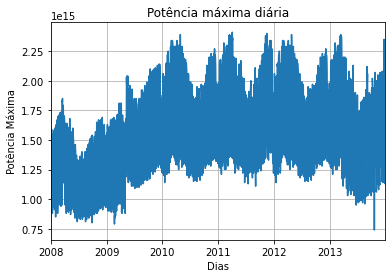

In [17]:
plt.plot(df_maxpot_dia['Dia'], df_maxpot_dia['Potencia Maxima']) 


#título do plot
plt.title('Potência máxima diária')

#determinando o nome dos eixos
plt.xlabel('Dias')
plt.ylabel('Potência Máxima')


#determinando o intervalo do plot
plt.xlim(df_maxpot_dia['Dia'][0], df_maxpot_dia['Dia'][df_maxpot_dia['Dia'].index[-1]])



# plt.gcf().autofmt_xdate()
# date_format = mpl_dates.DateFormatter('%d %')

plt.grid()
plt.show()

##### Não compreendi o porquê de aparecer somente os anos no eixo horizontal, o desejado seria aparecer os dias também?

### Gráfico da potência máxima semanal

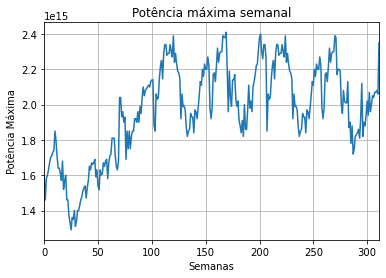

In [18]:
plt.plot(df_maxpot_semana.Semana, df_maxpot_semana['Potencia Maxima'])


#título do plot
plt.title('Potência máxima semanal')

#determinando o nome dos eixos
plt.xlabel('Semanas')
plt.ylabel('Potência Máxima')

#determinando o intervalo do plot
plt.xlim(0, 311)

plt.grid()
plt.show()